# Etterbehandling av named sections i FEM-Design
Plotter og beregner resultanter. Figuren under viser en dekkeskive som spenner mellom to vegger, den har tre named sections fra venstre mot høyre RS1, RS2 og RS3. Snittene er tatt 0,5 m fra opplegg og midt i felt. Resultatene er så eksportert til en teksfil som leses her.

![figur](figur1.png "FEM-Modell")

### Lesing av tekstfil:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("labeledSection.txt", sep='\t', lineterminator='\n', header=None)
df.columns = ["ID", "x/Type", "Mx'", "My'", "Mx'y'", "Nx'", "Ny'", "Nx'y'", "Tx'z'", "Ty'z'", "Case"]

In [3]:
df = df.fillna(method='ffill')
RS1 = df.loc[df['ID'] == 'RS1.1']
RS2 = df.loc[df['ID'] == 'RS2.1']
RS3 = df.loc[df['ID'] == 'RS3.1']

### Noen funksjoner for plotting og summasjon av snittkrefter

In [4]:
def plotDiagrams(df):
    x= df['x/Type']
    y1=df["Nx'"]
    y2=df["Ny'"]
    y3=df["Nx'y'"]
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
    
    ax1.fill_between(x, 0, y1)
    ax1.set_ylabel('Nx')
    
    ax2.fill_between(x, 0, y2)
    ax2.set_ylabel('Ny')
    
    ax3.fill_between(x, 0, y3)
    ax3.set_ylabel('Nxy')
    ax3.set_xlabel('x')
    print("Skjærkraft V = " + str(shear(df)) + " kN")
    print("Moment Mx = " + str(moment(df,"Nx'"))+ " kNm")

In [5]:
def moment(df, column_name):
    mid_pt=df["x/Type"].iloc[-1]/2
    width=df["x/Type"].iloc[1]-df["x/Type"].iloc[0]
    arm=df["x/Type"]-mid_pt
    moment = df[column_name]*arm*width
    return moment.sum()

def axial(df, column_name):
    width=df["x/Type"].iloc[1]-df["x/Type"].iloc[0]
    return df[column_name].sum()*width

def shear(df):
    width=df["x/Type"].iloc[1]-df["x/Type"].iloc[0]
    return df["Nx'y'"].sum()*width
    

### Plot av skivekrefter 

Skjærkraft V = 10.512 kN
Moment Mx = 5.239929999999999 kNm


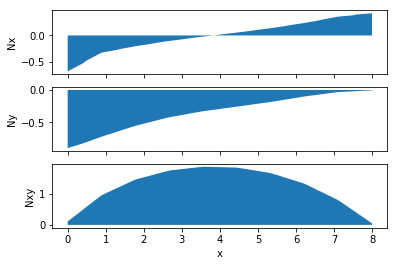

In [6]:
plotDiagrams(RS1)

Skjærkraft V = 0.0 kN
Moment Mx = 64.64184 kNm


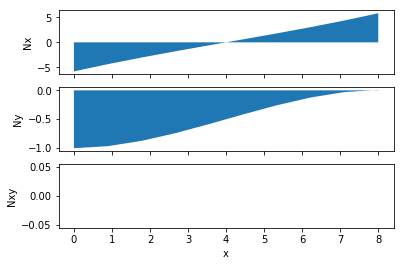

In [7]:
plotDiagrams(RS2)

Skjærkraft V = -10.512 kN
Moment Mx = 5.239929999999999 kNm


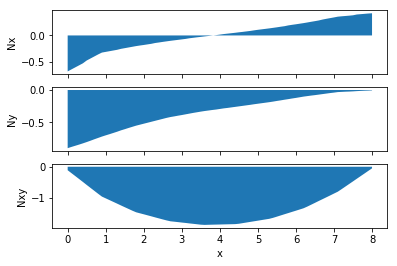

In [8]:
plotDiagrams(RS3)